In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
first_data = pd.read_csv("accidents_2005_to_2007.csv",low_memory=False)
second_data = pd.read_csv("accidents_2009_to_2011.csv",low_memory=False)
third_data = pd.read_csv("accidents_2012_to_2014.csv",low_memory=False)

data = pd.concat([first_data, second_data, third_data])

Kırsal ve kentsel alanlar nasıl farklılaştı?

In [18]:
datas_2_for_plotting = data.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude',
       'Latitude', 'Police_Force','Local_Authority_(District)','Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], axis=1,inplace=False)

C:\Users\wasd0\AppData\Local\Temp\ipykernel_19344\1884381588.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


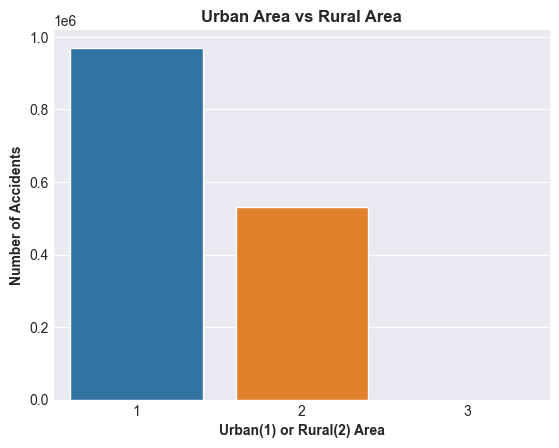

In [41]:
import seaborn as sns
datas_2_for_plotting["Urban_or_Rural_Area"].value_counts()
plt.style.use("seaborn-darkgrid")

sns.countplot(x="Urban_or_Rural_Area",data=datas_2_for_plotting)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Urban(1) or Rural(2) Area",weight="bold")
plt.title("Urban Area vs Rural Area",weight="bold")

plt.show() 

Kaza oranlarını ne artırır?

In [40]:
accident_year_surface = data.groupby(["Year", "Road_Surface_Conditions"])[["Number_of_Casualties"]].sum()
                                                                                
accident_year_surface.describe().T

accident_year_surface.reset_index(inplace = True)
accident_year_surface

,Year,Road_Surface_Conditions,Number_of_Casualties
0,2005,Dry,181423
1,2005,Flood (Over 3cm of water),261
2,2005,Frost/Ice,4550
3,2005,Snow,1462
4,2005,Wet/Damp,83017
5,2006,Dry,172825
6,2006,Flood (Over 3cm of water),380
7,2006,Frost/Ice,2758
8,2006,Snow,648
9,2006,Wet/Damp,81515


C:\Users\wasd0\AppData\Local\Temp\ipykernel_19344\3147228228.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x = "Year", y = "Number_of_Casualties", data = accident_year_surface, ci = 0)


<AxesSubplot: xlabel='Year', ylabel='Number_of_Casualties'>

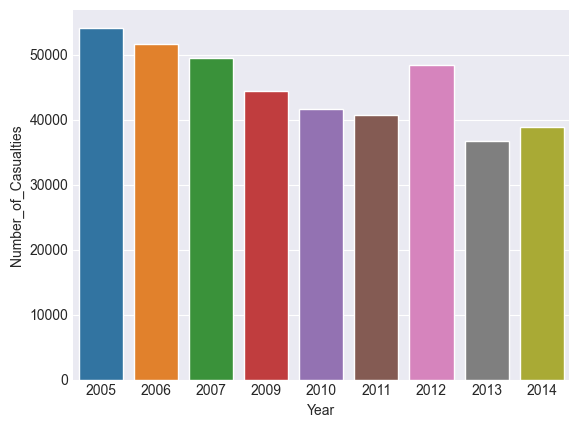

In [25]:
import seaborn as sns
sns.barplot(x = "Year", y = "Number_of_Casualties", data = accident_year_surface, ci = 0)

C:\Users\wasd0\AppData\Local\Temp\ipykernel_19344\1019156074.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x = "Year", y = "Number_of_Casualties",hue = "Road_Surface_Conditions", data = accident_year_surface, ci = 0)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2005'),
  Text(1, 0, '2006'),
  Text(2, 0, '2007'),
  Text(3, 0, '2009'),
  Text(4, 0, '2010'),
  Text(5, 0, '2011'),
  Text(6, 0, '2012'),
  Text(7, 0, '2013'),
  Text(8, 0, '2014')])

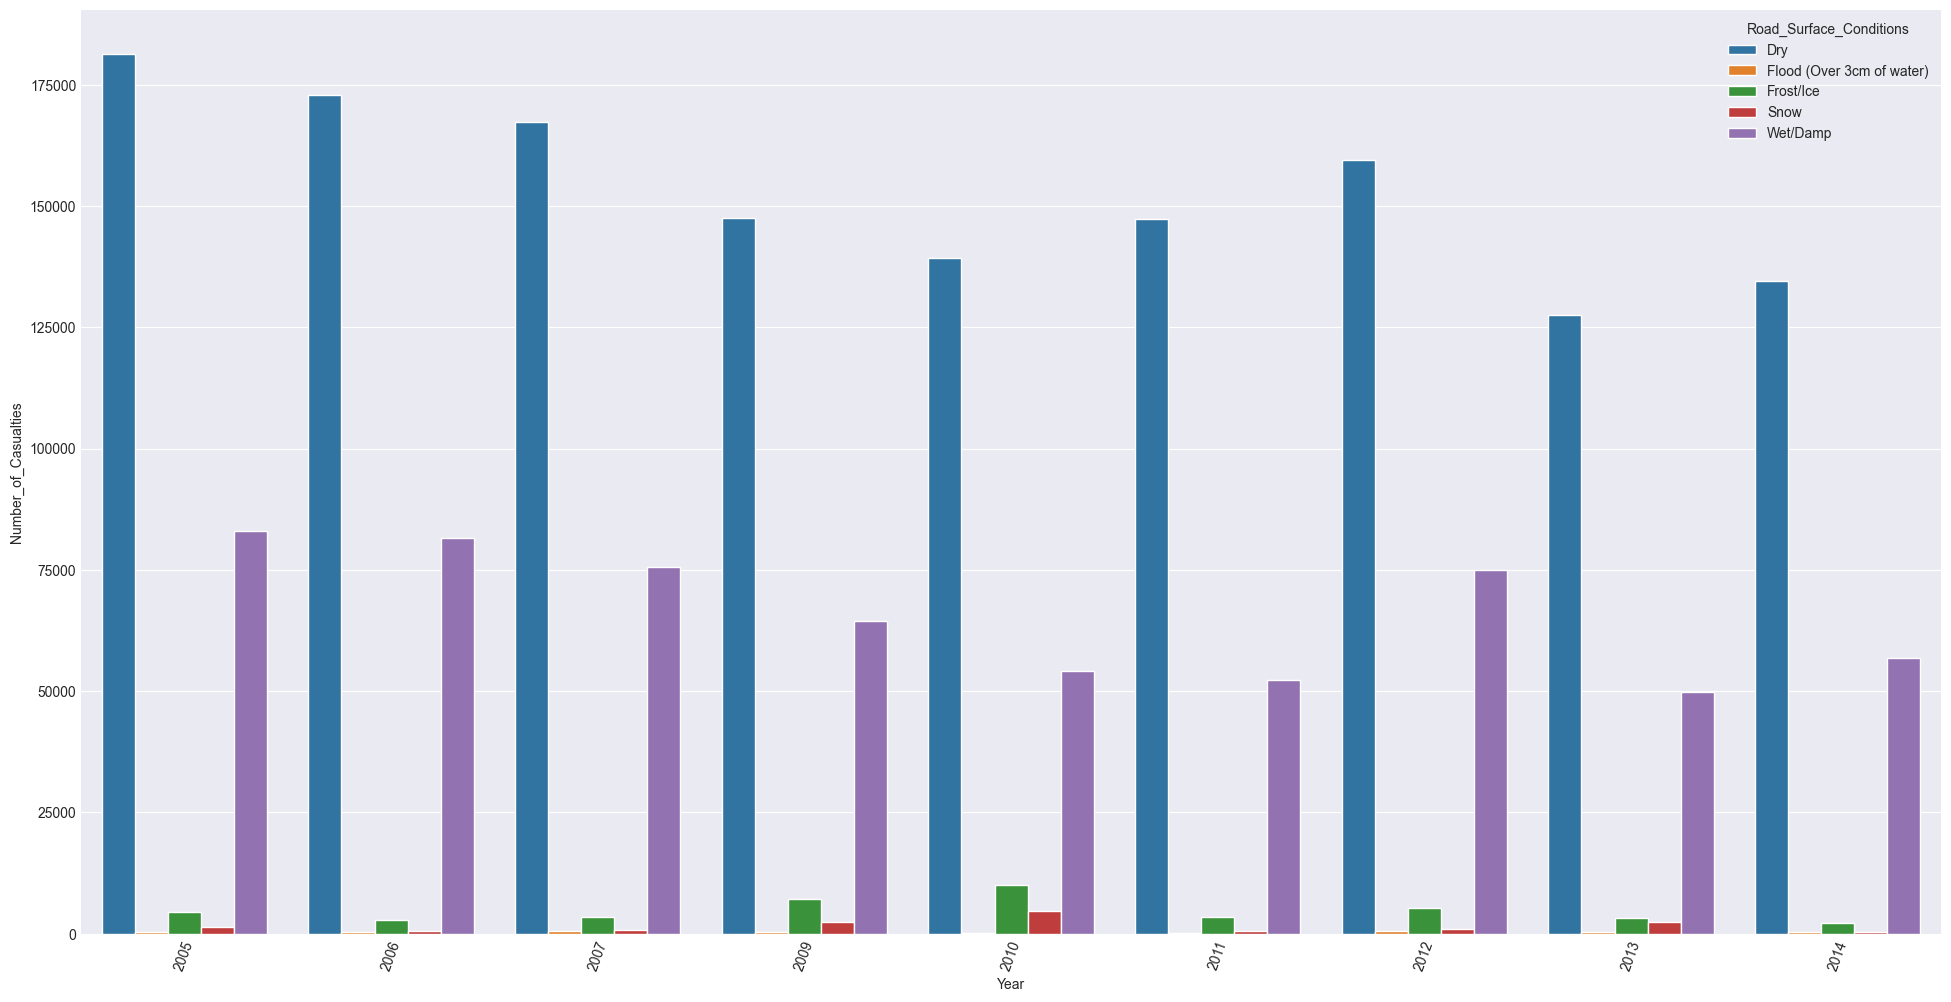

In [26]:
plt.figure(figsize = (24, 12))
sns.barplot(x = "Year", y = "Number_of_Casualties",hue = "Road_Surface_Conditions", data = accident_year_surface, ci = 0)
plt.xticks(rotation = 70)

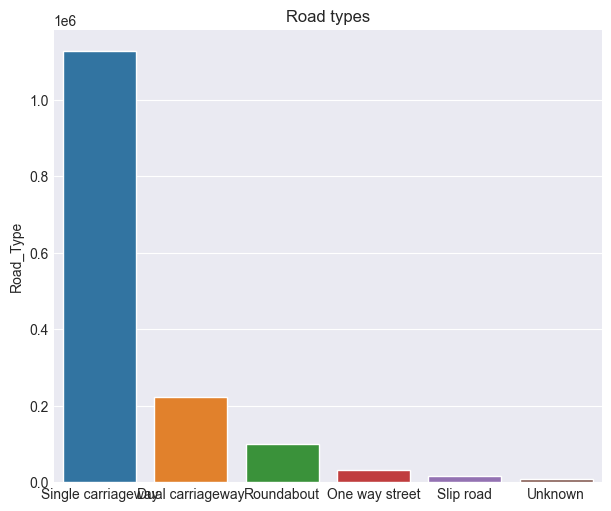

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))

road = data["Road_Type"].value_counts()

sns.barplot(ax=axs, x = road.index, y = road)
axs.set_title("Road types")


plt.show()

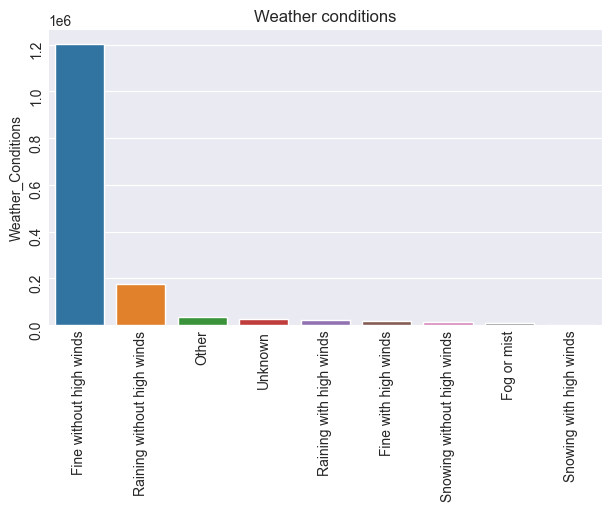

Fine without high winds       1203943
Raining without high winds     177663
Other                           33503
Unknown                         28296
Raining with high winds         20813
Fine with high winds            18355
Snowing without high winds      11301
Fog or mist                      8190
Snowing with high winds          1960
Name: Weather_Conditions, dtype: int64

In [28]:
weather = data["Weather_Conditions"].value_counts()

fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))

sns.barplot(ax=axs, x = weather.index, y = weather)
axs.set_title("Weather conditions")
axs.tick_params(labelrotation=90)


plt.show()

weather

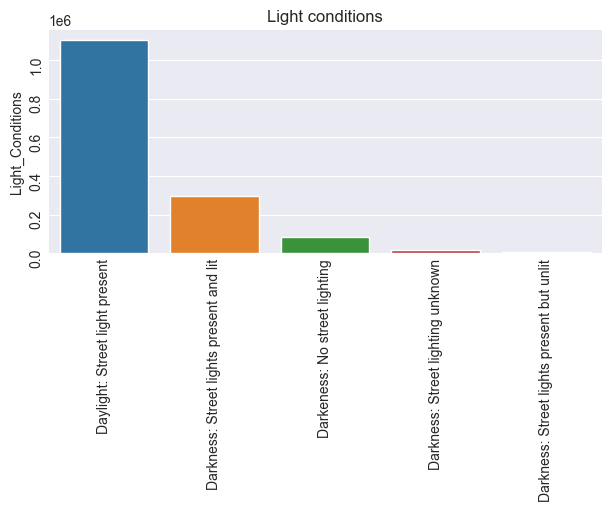

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))

light = data["Light_Conditions"].value_counts()

sns.barplot(ax=axs, x = light.index, y = light)
axs.set_title("Light conditions")
axs.tick_params(labelrotation=90)

Text(0.5, 1.0, 'Speed limit')

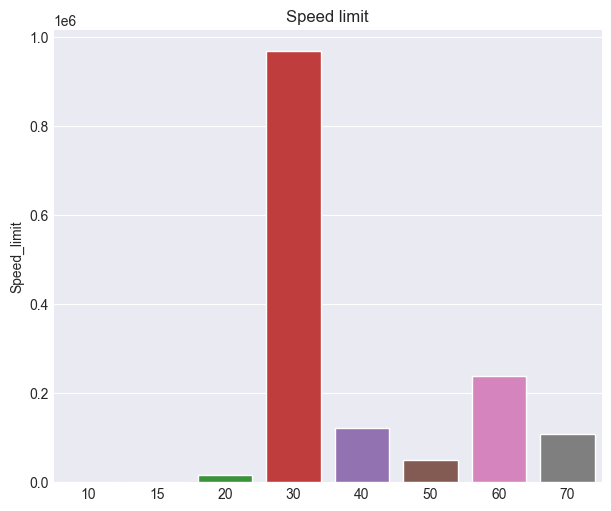

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))

speed = data["Speed_limit"].value_counts()
sns.barplot(ax=axs, x = speed.index, y = speed)
axs.set_title("Speed limit")

Zaman içinde kaza oranlarını tahmin edebilir miyiz?

In [43]:
x = data.sample(frac=.1)
# x = accident_data.head(1)
y = x[['Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Weather_Conditions','Light_Conditions',
       'Road_Surface_Conditions','Speed_limit']]
y['Weather_Conditions'] = y['Weather_Conditions'].astype('category')
y['Light_Conditions'] = y['Light_Conditions'].astype('category')
y['Road_Surface_Conditions'] = y['Road_Surface_Conditions'].astype('category')
y['Speed_limit'] = y['Speed_limit'].astype('category')

print(y.size)
"""
y['Weather_Conditions_Cat'] = y['Weather_Conditions'].cat.codes
y['Light_Conditions_Cat'] = y['Light_Conditions'].cat.codes
y['Road_Surface_Conditions_Cat'] = y['Road_Surface_Conditions'].cat.codes
y['Speed_limit_Cat'] = y['Speed_limit'].cat.codes
"""

y.head()

1052905


C:\Users\wasd0\AppData\Local\Temp\ipykernel_19344\3152369793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Weather_Conditions'] = y['Weather_Conditions'].astype('category')
C:\Users\wasd0\AppData\Local\Temp\ipykernel_19344\3152369793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Light_Conditions'] = y['Light_Conditions'].astype('category')
C:\Users\wasd0\AppData\Local\Temp\ipykernel_19344\3152369793.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Weather_Conditions,Light_Conditions,Road_Surface_Conditions,Speed_limit
330556,2,1,4,Raining without high winds,Darkeness: No street lighting,Wet/Damp,40
241972,3,3,2,Fine without high winds,Darkness: Street lights present and lit,Dry,40
330465,3,1,1,Fine without high winds,Daylight: Street light present,Dry,30
41047,3,2,1,Fine without high winds,Daylight: Street light present,Dry,30
484282,3,1,1,Fine without high winds,Darkness: Street lights present and lit,Dry,30


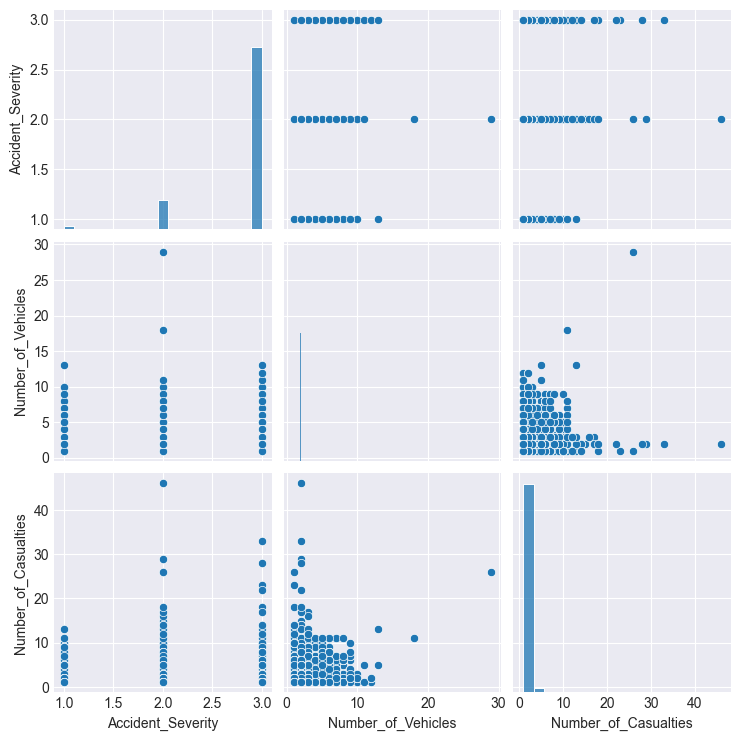

In [44]:
%matplotlib inline

import seaborn as sb
#sb.pairplot(y)
#y.index.is_unique
#y.index.duplicated()
k = y.loc[~y.index.duplicated(), :]

sb.pairplot(k)